<a href="https://colab.research.google.com/github/GilbertHD/HD2103/blob/main/HD_08_03_FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://levelup.gitconnected.com/face-recognition-system-using-google-colab-ccca1d56f5f3

In [1]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://media.npr.org/assets/img/2019/10/23/gettyimages-1177729963_wide-24bb05f751e2e5f9cdf86da436bb6bf1eb2ab45a-s800-c85.jpg -O known/mark.jpg

--2021-03-11 07:55:42--  https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239507 (234K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 233.89K  --.-KB/s    in 0.007s  

2021-03-11 07:55:42 (30.9 MB/s) - ‘known/elon.jpg’ saved [239507/239507]

--2021-03-11 07:55:42--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 184.31.3.237, 2606:2800:220:1410:489:141e:20bb:12f6
Connecting to pbs.twimg.com (pbs.twimg.com)|184.31.3.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23065 (23K) [image/jpeg]
Saving to: ‘known/bill.jpg’

known/bill.jpg      100%[===================>]  22.52K  --.-K

In [2]:
!mkdir unknown
!wget https://c.ndtvimg.com/2021-01/pdm65bmo_elon-musk_625x300_08_January_21.jpg -O unknown/1.jpg
!wget  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg -O unknown/2.jpg
!wget https://www.esquireme.com/public/styles/full_img/public/images/2019/12/04/inside-mark-zuckerberg-house.jpg?itok=ZelYXV2G -O unknown/3.jpg

--2021-03-11 07:55:47--  https://c.ndtvimg.com/2021-01/pdm65bmo_elon-musk_625x300_08_January_21.jpg
Resolving c.ndtvimg.com (c.ndtvimg.com)... 104.70.188.144, 2600:1408:8c00:784::24e8, 2600:1408:8c00:785::24e8
Connecting to c.ndtvimg.com (c.ndtvimg.com)|104.70.188.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34787 (34K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  33.97K  --.-KB/s    in 0.002s  

2021-03-11 07:55:47 (20.1 MB/s) - ‘unknown/1.jpg’ saved [34787/34787]

--2021-03-11 07:55:47--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Bill_Gates_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318220 (311K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 310.76K  --.

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=fa42a14130a9238ef857e0cd60f6cbb0faa3cc748ad9c20c89dc3d24e596d094
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
import face_recognition   ##Detecting and recogniting faces
import cv2     ## intracting with images
import os       ## For Reading the file name
from google.colab.patches import cv2_imshow ## we are importing cv2_imshow from google.colab.patches because google colab doesn't support cv2.imshow() funciton.

In [7]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 500            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

In [8]:
known_encodings = [] 
known_names = []
known_dir = 'known' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])
print(known_names) ## Printing all the known labels

['bill', 'mark', 'elon']


Processing 3.jpg
[0.72958465 0.35735902 0.86844916]


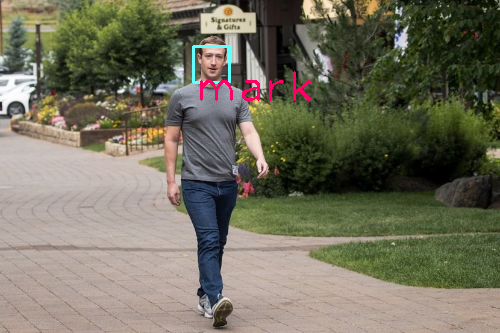

Processing 2.jpg
[0.33844834 0.79685108 0.81563798]


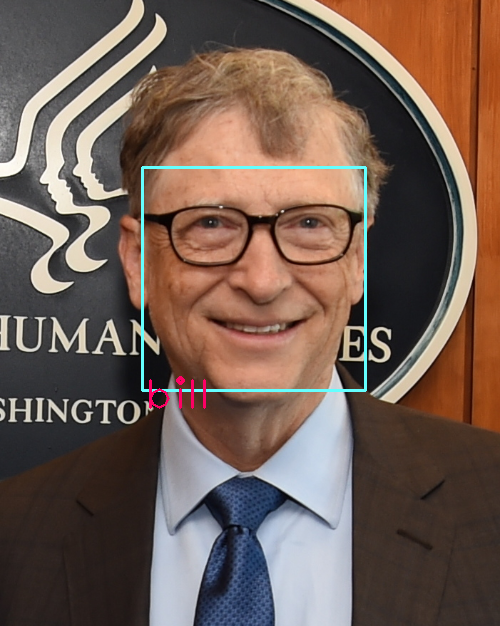

Processing 1.jpg
[0.64203208 0.80507845 0.39880691]


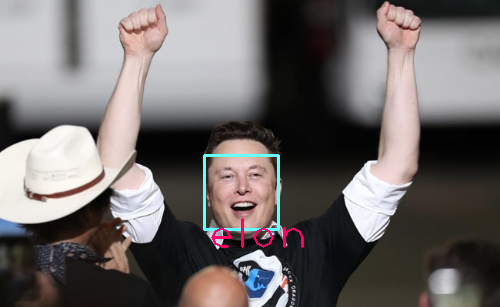

In [10]:
unknown_dir = 'unknown' ##UNknown Images Directory
for file in os.listdir(unknown_dir):
 print("Processing",file)
 img = read_img(unknown_dir + '/' + file)##reading images
 img_enc = face_recognition.face_encodings(img)[0]##Encodings
 results = face_recognition.compare_faces(known_encodings,img_enc)
 ##Comparing Known Encodings with Unknown encoding
 print(face_recognition.face_distance(known_encodings,img_enc))
 ## Printing Face Distances
 res = [i for i, val in enumerate(results) if val]
 name = known_names[res[0]]
 
 '''
Drawing a rectangle box around the faces of unknown images using  face_locations function in library
'''
 (top,right,bottom,left) = face_recognition.face_locations(img)[0]
 cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
 ##Drawing Rectangle
 cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,3, (100,0,255),2) ##Putting labels(names) on the rectangle
 cv2_imshow(img) ##showing images